## Project Overview

1. **Data Exploration**
2. **Data Preprocessing**
3. **Model Building**
4. **Model Evaluation**
5. **Conclusion**

# 1. Data Exploration


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

# Load the dataset
data_path = "C:/Users/rniga/Downloads/Drug.csv"
data = pd.read_csv(data_path)


print(data.head())

   Age Sex      BP Cholesterol        Na         K   Drug
0   23   F    HIGH        HIGH  0.792535  0.031258  drugY
1   47   M     LOW        HIGH  0.739309  0.056468  drugC
2   47   M     LOW        HIGH  0.697269  0.068944  drugC
3   28   F  NORMAL        HIGH  0.563682  0.072289  drugX
4   61   F     LOW        HIGH  0.559294  0.030998  drugY


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na           200 non-null    float64
 5   K            200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB


In [18]:
data.describe()

,Age,Na,K
count,200.000000,200.000000,200.000000
mean,44.315000,0.697095,0.050174
std,16.544315,0.118907,0.017611
min,15.000000,0.500169,0.020022
25%,31.000000,0.583887,0.035054
50%,45.000000,0.721853,0.049663
75%,58.000000,0.801494,0.066000
max,74.000000,0.896056,0.079788


In [31]:
#Missing Values Check
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na             0
K              0
Drug           0
dtype: int64

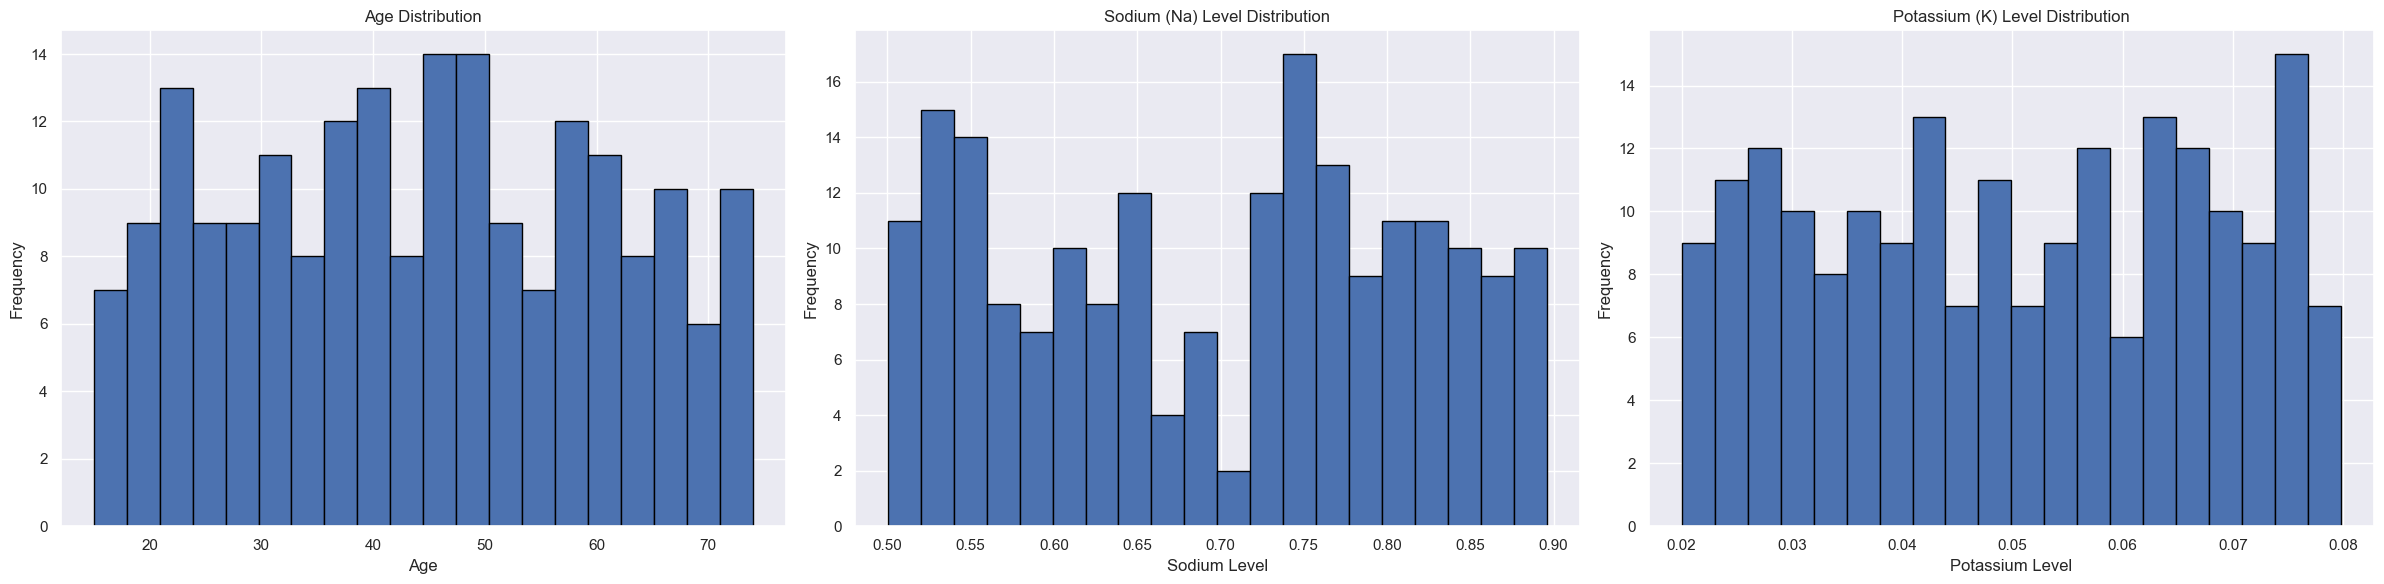

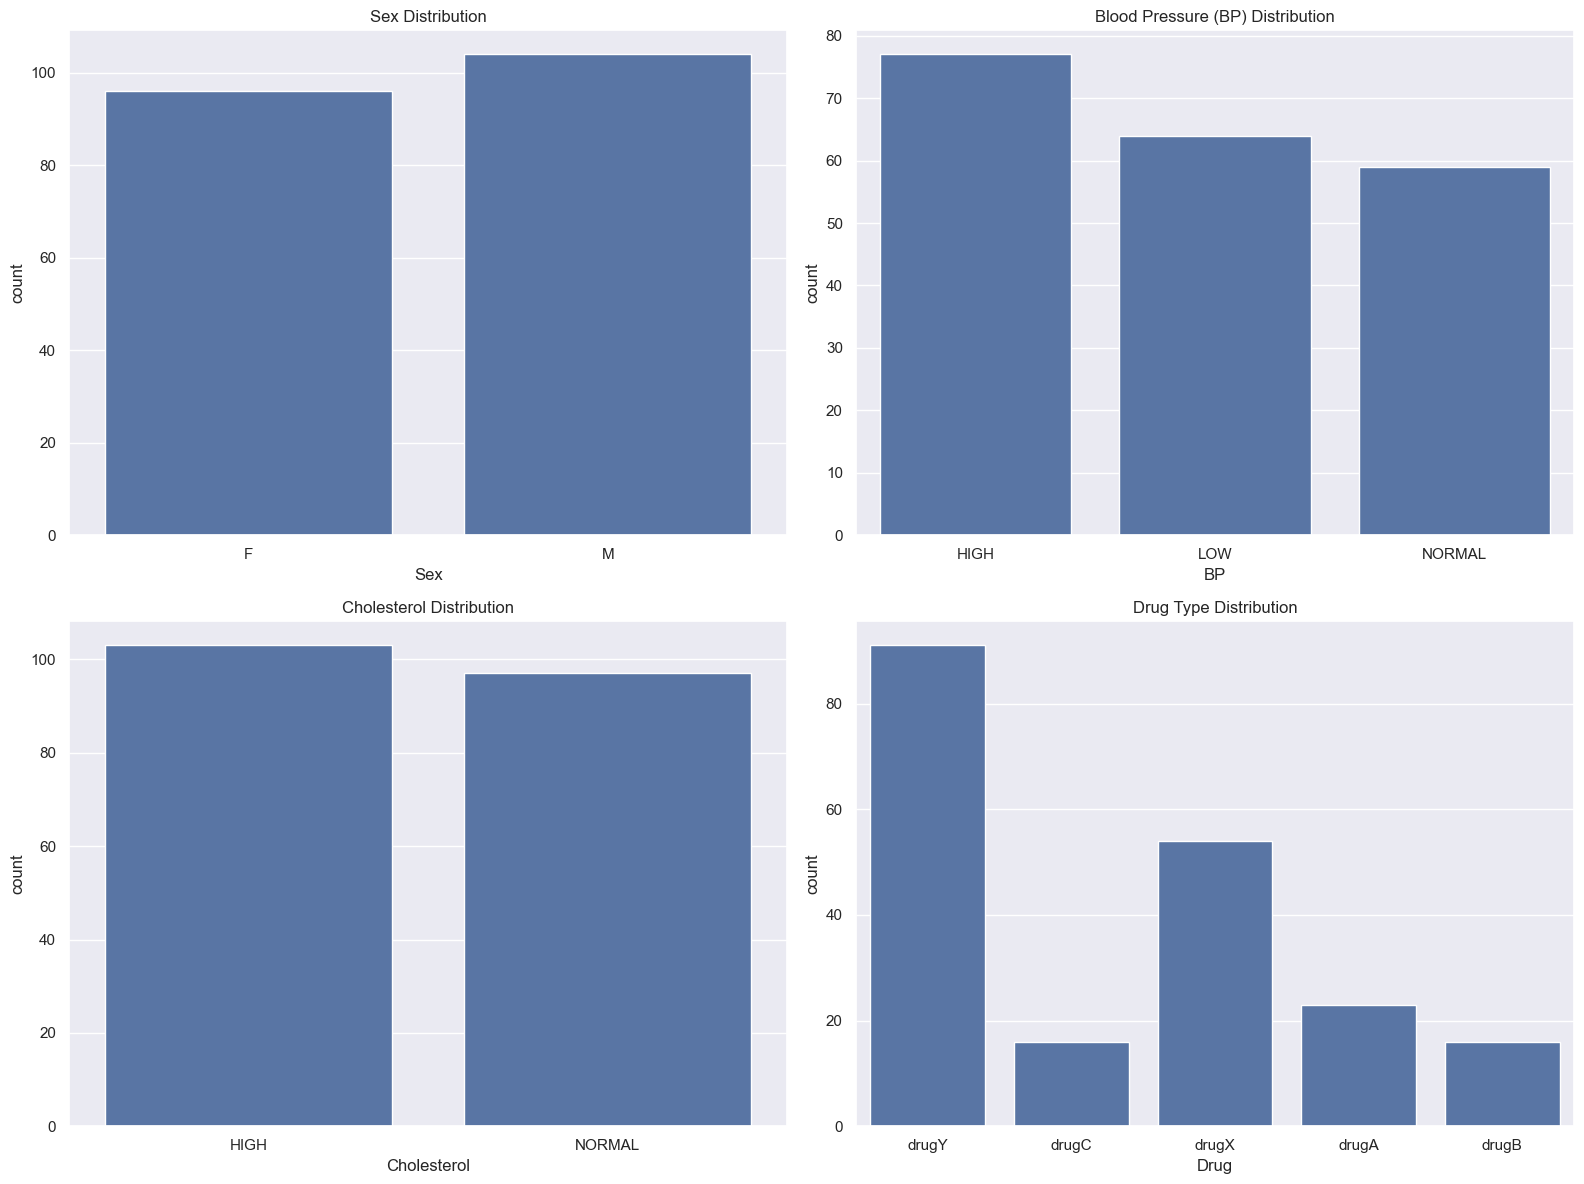

In [20]:
#Features Distribution
fig, ax = plt.subplots(1, 3, figsize=(24, 6))  # Adjust for 3 subplots
data['Age'].hist(ax=ax[0], bins=20, edgecolor='black')
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

data['Na'].hist(ax=ax[1], bins=20, edgecolor='black')  # Plot for Sodium
ax[1].set_title('Sodium (Na) Level Distribution')
ax[1].set_xlabel('Sodium Level')
ax[1].set_ylabel('Frequency')

data['K'].hist(ax=ax[2], bins=20, edgecolor='black')  # Plot for Potassium
ax[2].set_title('Potassium (K) Level Distribution')
ax[2].set_xlabel('Potassium Level')
ax[2].set_ylabel('Frequency')

plt.tight_layout()


# Categorical Features Distribution
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
sns.countplot(x='Sex', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Sex Distribution')

sns.countplot(x='BP', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Blood Pressure (BP) Distribution')

sns.countplot(x='Cholesterol', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Cholesterol Distribution')

sns.countplot(x='Drug', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Drug Type Distribution')

plt.tight_layout()


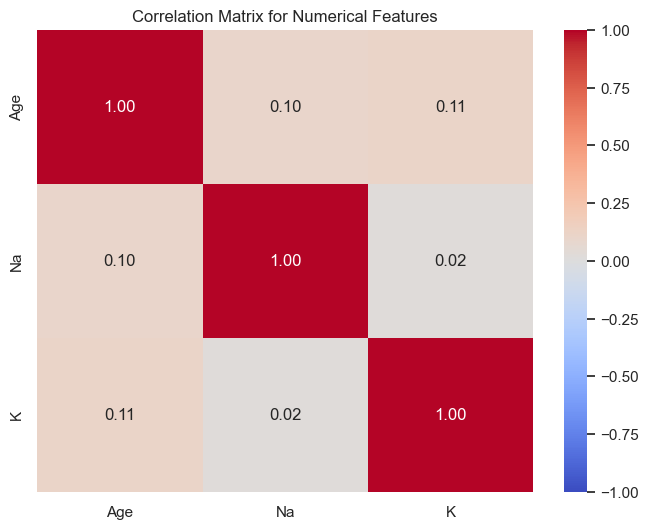

In [21]:
# Correlation Analysis for numerical features only
numerical_data = data[['Age', 'Na', 'K']]
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

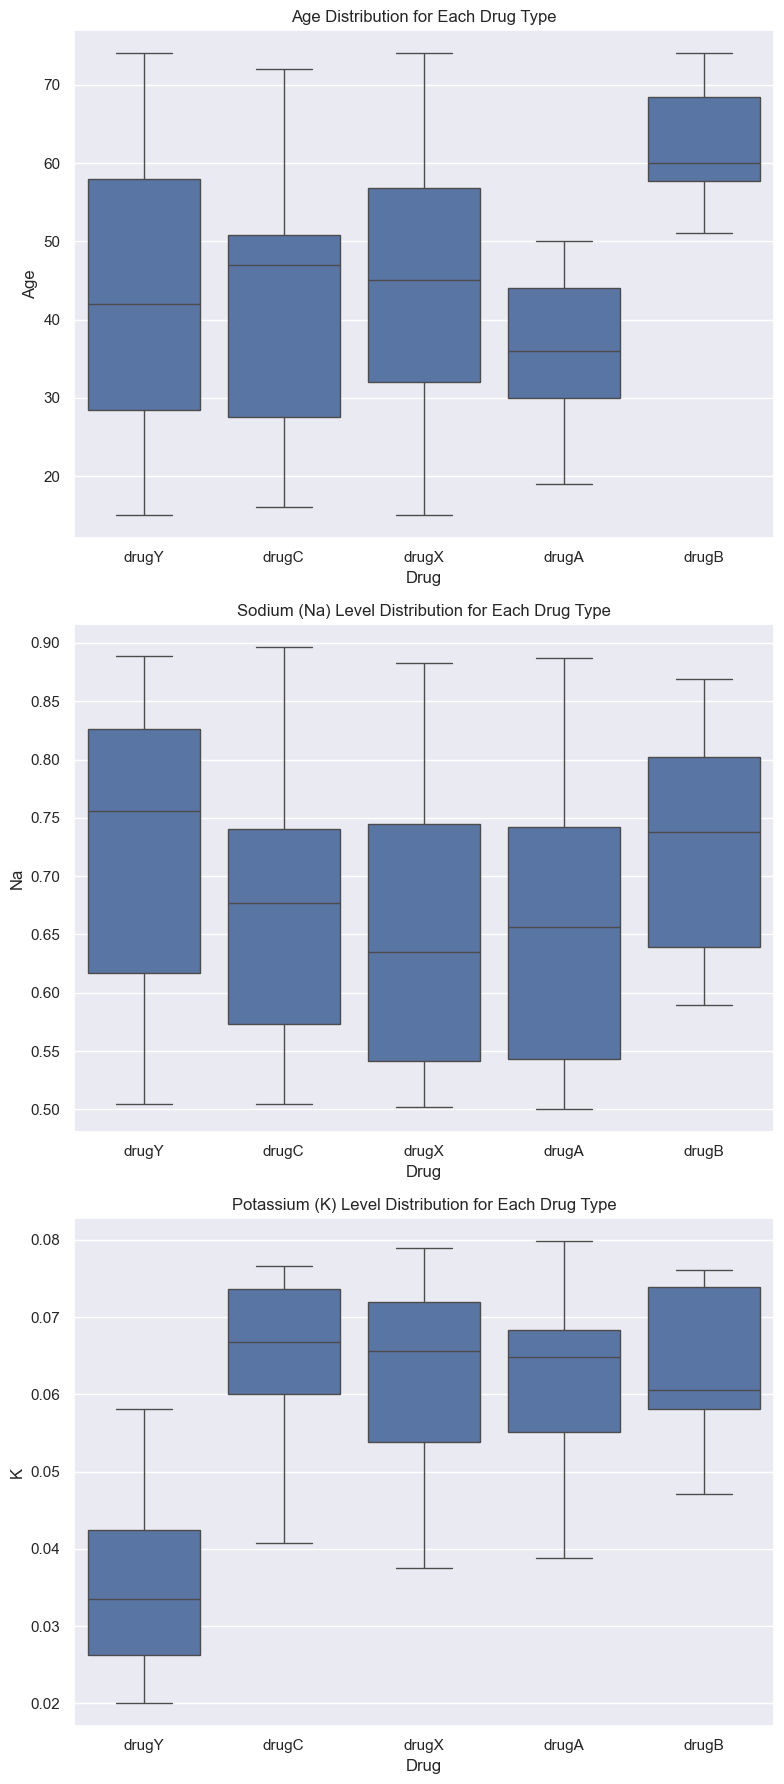

In [22]:
#Feature vs. Target Analysis
fig, ax = plt.subplots(3, 1, figsize=(8, 18))

# Boxplot
sns.boxplot(x='Drug', y='Age', data=data, ax=ax[0])
ax[0].set_title('Age Distribution for Each Drug Type')

sns.boxplot(x='Drug', y='Na', data=data, ax=ax[1])
ax[1].set_title('Sodium (Na) Level Distribution for Each Drug Type')

sns.boxplot(x='Drug', y='K', data=data, ax=ax[2])
ax[2].set_title('Potassium (K) Level Distribution for Each Drug Type')

plt.tight_layout()



# 2. Data Preprocessing


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X = data.drop('Drug', axis=1)
y = data['Drug']

numerical_features = ['Age', 'Na', 'K']
categorical_features = ['Sex', 'BP', 'Cholesterol']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encoding for categorical features and scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 3. Model Building


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Models
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
decision_tree = DecisionTreeClassifier()
svm = SVC()

models = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Decision Tree': decision_tree,
    'Support Vector Machine': svm
}

# Accuracies
accuracies = {}

for model_name, model in models.items():

    model.fit(X_train_processed, y_train)
    
    y_pred = model.predict(X_test_processed)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

accuracies

{'K-Nearest Neighbors': 0.875,
 'Logistic Regression': 0.975,
 'Decision Tree': 0.875,
 'Support Vector Machine': 0.9}

# 4. Model Evaluation


In [34]:
from sklearn.metrics import confusion_matrix, classification_report
from tabulate import tabulate

model_evaluation_metrics = {}


for model_name, model in models.items():

    y_pred = model.predict(X_test_processed)
    
    # Confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    classif_report = classification_report(y_test, y_pred)
    
    # Storing the results
    model_evaluation_metrics[model_name] = {
        'Confusion Matrix': conf_matrix,
        'Classification Report': classif_report
    }
    
    # Outputting the results for review
    print(f"{model_name} Evaluation Metrics:")
    print("Confusion Matrix:")
    print(tabulate(conf_matrix, headers=model.classes_, tablefmt='grid'))
    print("\nClassification Report:")
    print(classif_report)
    print("\n" + "="*60 + "\n")

K-Nearest Neighbors Evaluation Metrics:
Confusion Matrix:
+---------+---------+---------+---------+---------+
|   drugA |   drugB |   drugC |   drugX |   drugY |
+=========+=========+=========+=========+=========+
|       6 |       0 |       0 |       0 |       0 |
+---------+---------+---------+---------+---------+
|       0 |       3 |       0 |       0 |       0 |
+---------+---------+---------+---------+---------+
|       1 |       0 |       2 |       1 |       1 |
+---------+---------+---------+---------+---------+
|       1 |       0 |       0 |       9 |       1 |
+---------+---------+---------+---------+---------+
|       0 |       0 |       0 |       0 |      15 |
+---------+---------+---------+---------+---------+

Classification Report:
              precision    recall  f1-score   support

       drugA       0.75      1.00      0.86         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.40      0.57         5
       drugX       0.90  

# 5. Conclusion

In this project, we have successfully navigated through various stages of a machine learning workflow: data exploration, preprocessing, model building, and evaluation. We applied four different classification algorithms—K-Nearest Neighbors (KNN), Logistic Regression, Decision Trees, and Support Vector Machines (SVM)—to predict the drug type based on patients' information.

### Key Findings:
- **Model Performance**: Summarize the performance of each model, highlighting which model(s) performed best based on the evaluation metrics (accuracy, precision, recall, F1-score) and why.
- **Feature Importance**: Discuss any insights on the importance or influence of specific features on the model's predictions if such analysis was conducted.
- **Model Comparison**: Provide a comparative analysis discussing how each model has its strengths and weaknesses in terms of performance, interpretability, and computational efficiency.

